# Geometry and shape spaces - TP 1


## 1. Reproducing kernels and interpolation


### Reproducing nuclei

Let $H$ be a Hilbert space of $f:{\mathbb R}^d\rightarrow{\mathbb R}$ functions. $H$ is a kernel space reproducing if there exists a function
$K_H:{\mathbb R}^d\times{\mathbb R}^d\rightarrow{\mathbb R}$ such as $\forall x\in{\mathbb R}^d, K_H(\cdot,x)\in H$, and

$$ \forall f\in H,\quad\forall x\in{\mathbb R}^d,\quad f(x)=\langle{K_H(\cdot,x)},f\rangle_H.$$

$K_H$ is then uniquely defined and is called the replicating kernel of $H$. We can notice that we have the following property (reproducing property):

$$\forall x,y\in{\mathbb R}^d,\quad \langle K_H(\cdot,x),K_H(\cdot,y)\rangle_H=K_H(x,y).$$

Conversely, it is possible, from a function $K:{\mathbb R}^d\times{\mathbb R}^d\rightarrow{\mathbb R}$ of positive type, to construct the unique Hilbert space $H$ of functions such as $K_H=K$.

### A first example: Sobolev space $H^1({\mathbb R})$

The Sobolev space $H^1({\mathbb R})$ is the space of functions of $L^2({\mathbb R})$ whose derivative in the weak sense also belongs to $L^2({\mathbb R})$. In fact any element of $H^1({\mathbb R})$ admits a continuous representative and we can also define $H^1({\mathbb R})$
classically as the space of continuous $f:{\mathbb R}\rightarrow{\mathbb R}$ functions, of square integrable, differentiable almost everywhere and such that $\int_x^yf'(t)dt=f(y)-f(x)$ for all $x,y$ reals. On this space we usually define the scalar product
$$\langle f,g\rangle_{H^1} = \int_{\mathbb R} f(t)g(t)+f'(t)g'(t)\;dt,$$
but we can also define more generally for a fixed $\sigma>0$ scale,
$$\langle f, g\rangle_{H^1_\sigma} = \int_{\mathbb R} f(t)g(t)+\sigma^2f'(t)g'(t)\;dt.$$
We denote $H^1_\sigma$ as the space $H^1({\mathbb R})$ provided with this scalar product. It is a Hilbert space.

__Question 1__: Show that $H^1_\sigma$ is a reproducing kernel space whose kernel is the function $K_\sigma:{\mathbb R}^2\rightarrow{\mathbb R}$ defined by

$$\forall x,y\in{\mathbb R},\quad K_\sigma(x,y)=\frac1{2\sigma}e^{-\frac{|x-y|}\sigma}.$$

__Question 2__: Verify the property of the kernel numerically: choose for example $\sigma=2$, any $f\in H^1_\sigma$ function (for example $f(x)=e^{-x^2}$), any real $x\in{\mathbb R}$, then calculate an approximate value of $\langle f, {K_\sigma(\cdot,x)}\rangle_{H^1_\sigma}$ by sums and finite differences and compare with $f(x)$. Also digitally check the reproducing property.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,8)
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# function to define the kernel
def KH1(x, y, sigma=1):
    return np.exp(-np.abs(x - y) / sigma) / (2 * sigma)

# function to define the dot product
def H1ScalProd(f, g, sigma=1):
    # f and g are two python functions
    # must return <f, g>_H1 calculated by finite sums and differences
    t = np.linspace(-20, 20, 10000)
    dt = t[2] - t[1]
    ft = f(t)
    dfdt = np.gradient(ft, dt)
    gt = g(t)
    dgdt = np.gradient(gt, dt)
    return np.sum(ft * gt + sigma**2 * dfdt * dgdt) * dt

# definition of parameters and functions to test
def f(y):
    return np.exp(-y**2)

def KH1x(y):
    return KH1(y, x, sigma)

# test: value of the dot product <f, KH1(., x)>_H1 and comparison with f(x)
print("value of the dot product <f, KH1(., x)>_H1: ", H1ScalProd(f, KH1x, sigma))
print("value of f(x) = ", f(x))

# checking the reproducing property: calculation of <KH1(., y), KH1(., x)>_H1 and comparison with KH1(x, y)
def KH1y(x):
    return KH1(x, y, sigma)

print("value of <KH1(., y), KH1(., x)>_H1: ", H1ScalProd(KH1x, KH1y, sigma))
print("value of KH1(x, y): ", KH1(x, y, sigma))


value of the dot product <f, KH1(., x)>_H1:  0.3678839163706743
value of f(x) =  0.36787944117144233
value of <KH1(., y), KH1(., x)>_H1:  0.09196998100935216
value of KH1(x, y):  0.09196986029286058


### Scalar interpolation problem

The $K_H$ kernel solves the following interpolation problem:

$$\left\{\begin{array}{l}
\text{Minimiser }\left\|f\right\|_H\text{ pour }f\in H, 
\\ \text{sous les contraintes }f(y_i)=c_i,\quad 1\leq i\leq n
\end{array}\right.
$$

where $y_i\in{\mathbb R}^d, c_i\in$ are set. The solution to this problem is given by
$$f^*(x)=\sum_{j=1}^nK_H(x,y_j)a_j,$$
where the $a_j\in{\mathbb R}$ are solutions of the linear system

$$\forall i,\quad 1\leq i\leq n,\quad\sum_{j=1}^nK_H(y_i,y_j)a_j=c_i.$$

These equations can be written in condensed form: let's note ${\bf y}=(y_1,\ldots,y_n)\in{\mathbb R}^{dn}$, $\boldsymbol{a}=(a_1,\ldots,a_n)\in{\mathbb R}^{n}$, ${\bf c}=(c_1,\ldots,c_n)\in{\mathbb R}^{n}$, and $K_H({\bf y},{\bf y})\in\mathcal{M}_{n}({\mathbb R})$ the matrix of $K_H(y_i,y_j)$ for $1\leq i,j\leq n$. The linear system to be solved is then written

$$K_H({\bf y},{\bf y}){\bf a}={\bf c}.$$

Similarly, the evaluation of the $f^*$ solution at $x_i\in{\mathbb R}^d, 1\leq i\leq p$ points is written

$${\bf f}^*({\bf x})=K_H({\bf x},{\bf y}){\bf a},$$

where ${\bf x}=(x_1,\ldots,x_p)\in{\mathbb R}^{dp}$, ${\bf f}^*({\bf x})=(f^*(x_1),\ldots,f^*(x_p))$, and $K_H({\bf x},{\bf y})\in\mathcal{M}_{p,n}({\mathbb R})$ is the matrix of $K_H(x_i,y_j)$ for $1\leq i\leq p$, $1\leq j\leq n$.

<br>
<br>

__Question 3__: Write a function
`KernelMatrix(x,y,h)` which constructs
the $K_H({\bf x},{\bf y})$ matrix for arbitrary ${\bf x}\in{\mathbb R}^{pd}$, ${\bf y}\in{\mathbb R}^{nd}$ points (assumed to be entered in the form of $p\times d$ and $n\times d$ tables), and a kernel of the form $K_H(x,y)=h\left(\|x-y\|\right)$, where $h$ is a scalar function.

In [4]:
def KernelMatrix(x,y,h):
    p,d = x.shape    # p: number of points in x, d: dimensionality of each point
    n = y.shape[0]   # n: number of points in y
    x = np.reshape(x,(p,1,d))    # 1: prepare the arrays for broadcasting (smaller array across larger one) during subtraction. 
    y = np.reshape(y,(1,n,d))
    D = np.linalg.norm(x-y,axis=2) # matrix of the ||xi-yj||, of shape (p,n) {norm((p, n, d), axis=2)}
    K = h(D)
    return K

x = np.reshape(x, (p, 1, d)): This changes x from a 2D array of shape (p, d), where p is the number of points and d is the dimensionality of each point—into a 3D array of shape (p, 1, d). The 1 in the middle is a singleton dimension, which doesn't change the actual data but changes how NumPy will handle operations involving x.

The reason for adding these singleton dimensions is to prepare the arrays for broadcasting during the subtraction operation.

Ex: assume x and y are both sets of points in 3-dimensional space, and you want to compute the distance between each point in x to each point in y. Without reshape, if you tried to subtract y from x, you'd get an error because their shapes wouldn't be compatible for element-wise subtraction. However, with reshape, x becomes of shape (p, 1, 3) and y becomes of shape (1, n, 3). Now, when you subtract these two arrays, NumPy sees the mismatched dimensions (specifically the ones with size 1) and automatically "broadcasts" the smaller array across the larger one. The subtraction is carried out as if you had two arrays of shape (p, n, 3), where each x point is subtracted from each y point, and the result is an array where each (i, j) entry contains the difference between point i from x and point j from y.

<br>
Here is an example of its use:

10 points randomly drawn from [0,1]^2


In [5]:
import numpy as np
x = np.random.rand(10,2)        # 10 points tirés aléatoirement dans [0,1]^2
y = np.random.rand(15,2)        # 15 points tirés aléatoirement dans [0,1]^2
sigma = 1.5                     # échelle du noyau (kernal scale)
def gauss(sigma):
    def f(u):
        return np.exp(-u**2/sigma**2)
    return f
Kxy = KernelMatrix(x,y,gauss(sigma))
print(Kxy.shape)

(10, 15)


<br>
<br>

__Question 4__: Write a function
`Interp(x,y,c,h)`
which solves the interpolation problem $f(y_i)=c_i$, $1\leq i\leq n$ and returns the evaluation of the solution at points $x_i$, $1\leq i\leq p$`

In [6]:
def Interp(x,y,c,h):
    # define the linear system and solve
    Kyy = KernelMatrix(y,y,h)
    a = np.linalg.solve(Kyy,c)
    # apply to compute values at x
    return KernelMatrix(x,y,h)@a

Kyy = KernelMatrix(y,y,h): This line computes the kernel matrix for the set of points y using the kernel function h. The resulting matrix Kyy is a square matrix where each element represents the kernel evaluated at a pair of points in y. This matrix is essential for setting up the system of equations that we need to solve for interpolation.

a = np.linalg.solve(Kyy,c): Once we have the kernel matrix Kyy, we use it to solve the linear system Kyy * a = c. The vector c contains the values that we want our interpolating function to have at each point in y. The function np.linalg.solve is used to find the vector a, which contains the coefficients of the interpolating function. These coefficients are the weights that will be applied to the kernel functions centered at the points in y.

return KernelMatrix(x,y,h)@a: After we have the coefficients a, we want to compute the values of the interpolating function at a new set of points x. To do this, we compute another kernel matrix KernelMatrix(x,y,h), which represents the kernel evaluated between each point in x and each point in y. We then use the matrix multiplication operator @ to multiply this matrix with the vector a to get the interpolated values at points x.

<br>

__Question 5__: Test the `Interp` function first with $d=1$:

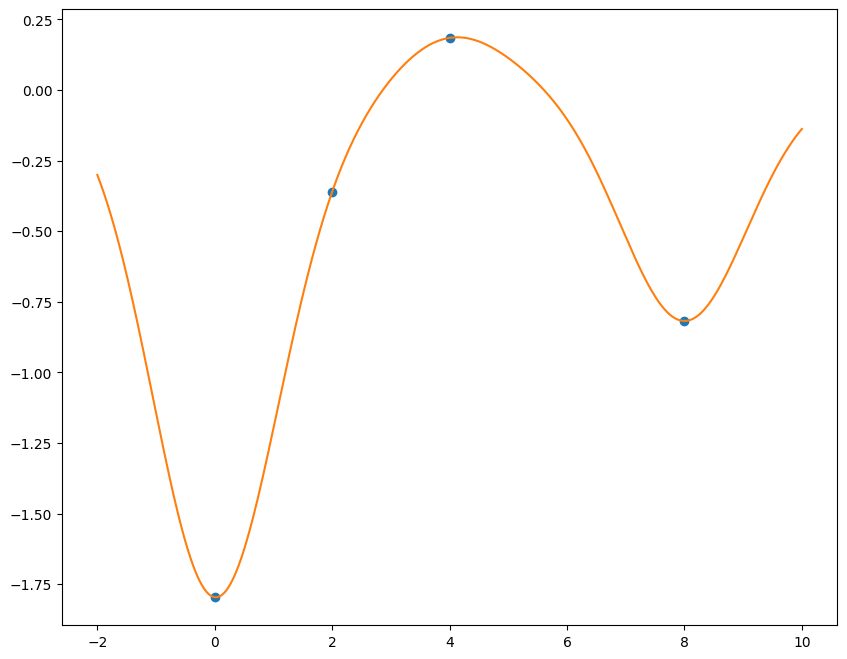

In [7]:
y = np.array([0,2,4,8])[:,None]         # vecteur [0,2,4,8] sous forme de tableau 4x1 (vector [0,2,4,8] as 4x1 array)
c = np.random.randn(4,1)                # valeurs tirées aléatoirement (randomly drawn values)
x = np.linspace(-2,10,1000)[:,None]     # points xj où évaluer l'interpolation (points xj where to evaluate the interpolation)
fx = Interp(x,y,c,gauss(sigma))         # calcul de l'interpolation (calculation of interpolation)

plt.plot(y,c,'o')                       # affichage
plt.plot(x,fx);

<br>
<br>

Then test the same problem by changing the scale of the kernel: we will thus take $h(u)=e^{-u^2/\sigma^2}$ for $\sigma\in\{0.2,2,4,10\}$. Display the different solutions on the same graph. Also test interpolation with Cauchy kernels: $h(u)=\frac1{1+u^2/\sigma^2}$.

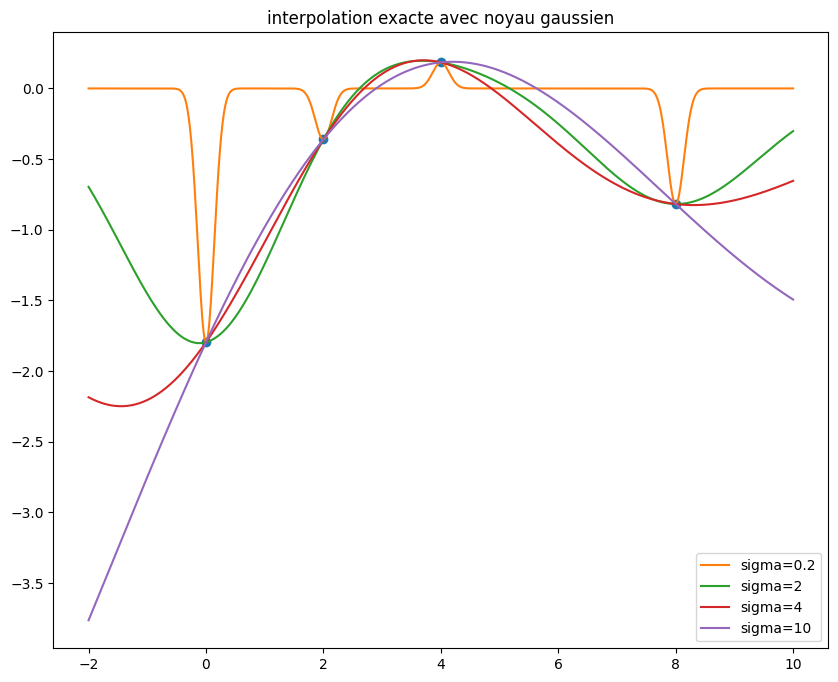

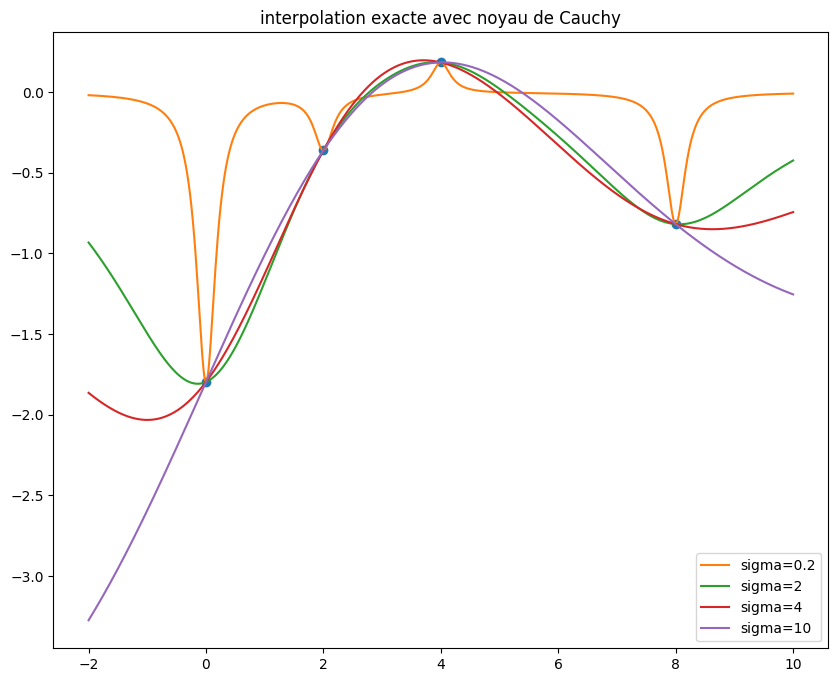

In [8]:
def cauchy(sigma) :
    def f(u) :
        return 1/(1+u**2/sigma**2)
    return f

for noyau in [(gauss,"noyau gaussien"),(cauchy,"noyau de Cauchy")] :
    fct, id = noyau
    plt.figure()
    plt.title("interpolation exacte avec "+id)
    plt.plot(y,c,'o');
    for sigma in [0.2,2,4,10] :
        fx = Interp(x,y,c,fct(sigma))               # calcul de l'interpolation        
        plt.plot(x,fx,label="sigma="+str(sigma));   # affichage
    plt.legend()

<br>
<br>

__Question 6__: Perform the interpolation with a $K_\sigma$ kernel from the first part, and verify numerically
that the norm in $H^1_\sigma$ of the solution is always lower than the norm of other functions of $H^1_\sigma$ passing through the points (e.g. solutions of the interpolation problem with other kernels).

norme H1 de la solution H1 :  3.468485219829369
norme H1 de la solution gaussienne :  3.868450324945548


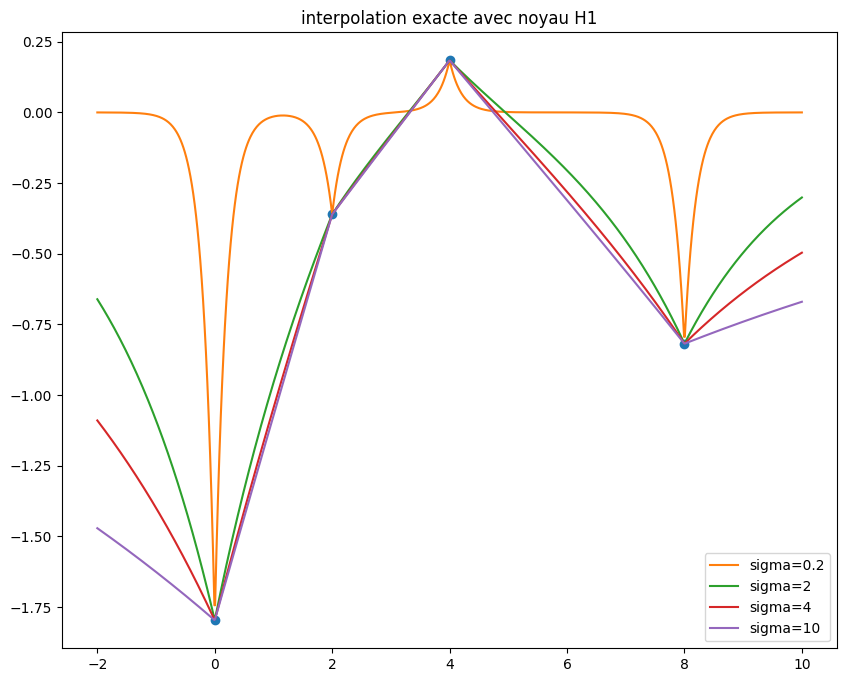

In [9]:
def H1fct(sigma) :
    def f(u) :
        return np.exp(-np.abs(u)/sigma)/(2*sigma)
    return f
plt.figure()
plt.title("interpolation exacte avec noyau H1")
plt.plot(y,c,'o');
for sigma in [0.2,2,4,10] :
    fx = Interp(x,y,c,H1fct(sigma))            # calcul de l'interpolation
    plt.plot(x,fx,label="sigma="+str(sigma));     # affichage 
plt.legend()

# vérification de la minimalité de la solution
sigma = 1.5
def fH1(x) :
    return Interp(x[:,None],y,c,H1fct(sigma)).flatten()
def fgauss(x) : 
    return Interp(x[:,None],y,c,gauss(sigma)).flatten()
print("norme H1 de la solution H1 : ",np.sqrt(H1ScalProd(fH1,fH1,sigma)))
print("norme H1 de la solution gaussienne : ",np.sqrt(H1ScalProd(fgauss,fgauss,sigma)))

<br>
<br>

__Question 7__: Now test the interpolation in the $d=2$ case: choose for example $10$ points $y_i$ in $[0,1]^2$ and real $c_i$s drawn randomly, then evaluate on a uniform grid of $100*100$ points which we will construct with the following command: `X1, X2 = np.meshgrid(t,t)`

In [10]:
def InterpGrid(X1,X2,y,c,h):
    p,q = X1.shape
    # define the linear system and solve
    Kyy = KernelMatrix(y,y,h)
    a = np.linalg.solve(Kyy,c)
    # build the x array:
    x = np.concatenate((X1.reshape(p*q,1),X2.reshape(p*q,1)),axis=1)
    # apply to compute values at x
    res = KernelMatrix(x,y,h)@a
    return np.reshape(res,(p,q))  

n = 10
d = 2
sigma = .25
y = np.random.rand(n,d)    # 10 points tirés aléatoirement dans [0,1]^2
c = np.random.randn(n,1)   # 10 valeurs aléatoires
t = np.linspace(0,1,50)
X1, X2 = np.meshgrid(t,t)  # grille uniforme de 50*50 points
Z = InterpGrid(X1,X2,y,c,gauss(sigma))

<br>

If the interpolated values ​​are in the `fX` array of size $100*100$, we will then display the solution with

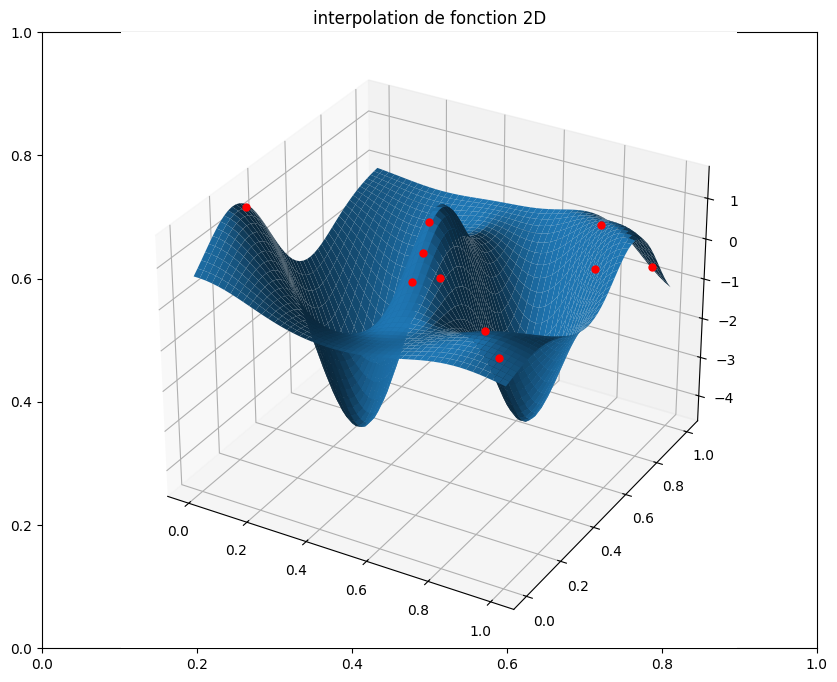

In [11]:
fig = plt.figure()
plt.title("interpolation de fonction 2D")
ax = plt.axes(projection='3d')
ax.plot_surface(X1,X2,Z, zorder=1)
ax.plot(y[:,0],y[:,1],c[:,0],'r.',markersize=10, zorder=3);

<br>
<br>

### Relaxed interpolation

In certain cases, the interpolation constraints may prove too strong for the Hilbert norm used (typically when the scale parameter $\sigma$ is large compared to the positions of the interpolation points). Numerically this results in a very poorly conditioned interpolation matrix. On the other hand, observation data may be noisy, in which case a function passing exactly through the constraints is no longer desirable. One solution then consists of writing a relaxed interpolation problem (_smoothing spline interpolation_):

$$\text{Minimiser }\quad\lambda\left\|f\right\|_H^2+\sum_{i=1}^n(f(y_i)-c_i)^2,$$
where $\lambda>0$ is a parameter to set.

<br>

__Question 8__: Show that the solution to the inexact interpolation is obtained by adding $\lambda$ to the diagonal coefficients of the matrix of the linear system.

<br>

Modify the previous functions to take this new model into account, and test it on the previous examples and on the following example:
```
y = np.linspace(0,1,30)[:,None]
c = np.cos(6*y) + .05*np.random.randn(30,1)
```
with $h(u)=e^{-u^2/\sigma^2}$ and the following parameter sets: $\sigma\in\{0.1,0.25\}, \lambda\in\{0,0.1\}$.


<hr>
Notes: 

To accommodate for the relaxed interpolation, the previous KernelMatrix and Interp functions would need to be adjusted to incorporate the regularization parameter λ into the kernel matrix before solving the linear system. The modified kernel matrix Kyy + λI (where I is the identity matrix) would then be used to solve for the coefficients that define the interpolating function.

<br>

Modify the previous functions to take this new model into account, and test it on the previous examples and on the following example:
```
y = np.linspace(0,1,30)[:,None]
c = np.cos(6*y) + .05*np.random.randn(30,1)
```
with $h(u)=e^{-u^2/\sigma^2}$ and the following parameter sets: $\sigma\in\{0.1,0.25\}, \lambda\in\{0,0.1\}$.

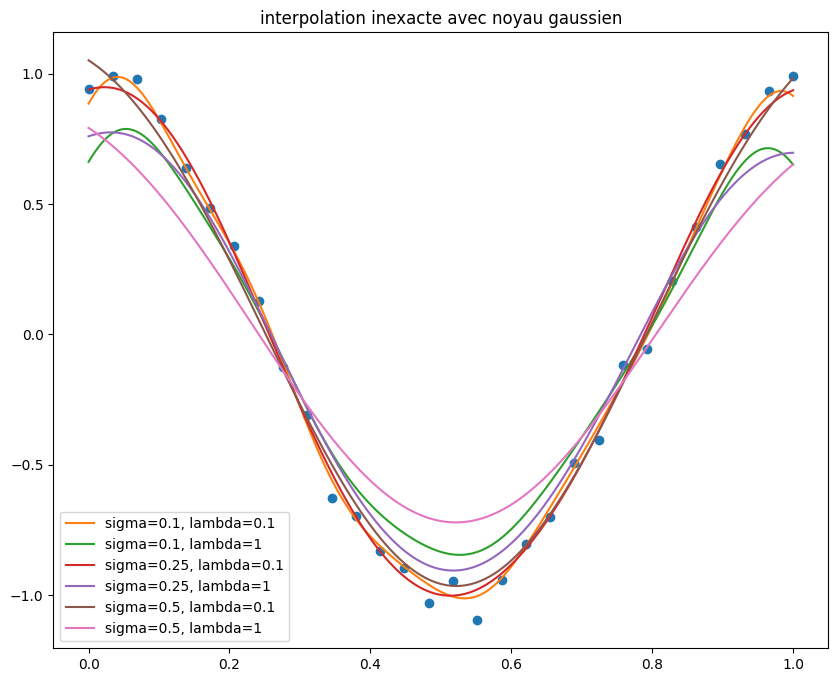

In [12]:
# redéfinition de Interp pour inclure le paramètre lambda (redefining Interp to include lambda parameter)
def Interp(x,y,c,h,l=0):
    a = np.linalg.solve(KernelMatrix(y,y,h) + l*np.eye(y.shape[0]), c)
    return np.dot(KernelMatrix(x,y,h), a)

# tests pour différentes valeurs de sigma et de lambda
n = 30
y = np.linspace(0,1,n)[:,None]
c = np.cos(6*y) + .05*np.random.randn(n,1)
x = np.linspace(0,1,1000)[:,None]
fct, id = gauss, "noyau gaussien"
plt.figure();
plt.title("interpolation inexacte avec "+id)
plt.plot(y,c,'o');
for sigma in [0.1,0.25,0.5]:
    for l in [0.1,1] :
        fx = Interp(x,y,c,gauss(sigma),l)            # calcul de l'interpolation        
        plt.plot(x,fx,label="sigma="+str(sigma)+", lambda="+str(l));   
plt.legend();

<br>
<br>

### Vector interpolation problem

We now assume that $V$ is a Hilbert space of vector-valued functions $v:{\mathbb R}^d\rightarrow{\mathbb R}^m$.
If it exists, the kernel reproducing $K_V$ of the $V$ space is then a ${\mathbb R}^d\times{\mathbb R}^d\rightarrow\mathcal{M}_m({\mathbb R})$ application, defined by the relation:

$$ \forall v\in V,\forall x\in{\mathbb R}^d,\forall \alpha\in{\mathbb R}^m,\quad\langle{v(x)},{\alpha}\rangle=\langle{K_V(\cdot,x)\alpha},v\rangle_V.$$

The reproducing property is then written

$$ \forall x,y\in{\mathbb R}^d,\forall \alpha,\beta\in{\mathbb R}^m,\quad\left\langle {K_V(\cdot,x)\alpha},{K_V(\cdot,y)\beta}\right\rangle_V=\langle{K_V(x,y)\beta},{\alpha}\rangle.$$

We consider the following exact vector interpolation problem:

$$\text{Minimiser }\left\| v\right\|_V\text{ pour $v\in V$, sous les contraintes }v(y_i)=\gamma_i,$$

where $y_i\in{\mathbb R}^d, \gamma_i\in{\mathbb R}^m$ are set, $1\leq i\leq n$. We also consider the associated relaxed problem:

$$\text{Minimiser }\lambda\|v\|_V^2+\sum_{i=1}^n\|v(y_i)-\gamma_i\|^2,$$

__Question 9__: Show that for a kernel of the form $K_V(x,y)=h(\|x-y\|)I_m$, exact and relaxed vector interpolation problems are equivalent to $m$ scalar interpolation problems
with the scalar kernel $K_H(x,y)=h(\|x-y\|)$ (we will assume that this kernel $K_H$ is indeed the kernel reproducing a Hilbert space $H$ of scalar functions).

<br>

If necessary, modify the `Interp` function so that it can also resolve vector interpolation problems.

In [12]:
# nothing to change here

<br>

__Question 10__: Test the `Interp` function with $d=m=2$: generate $y_i$ points in $[0,1]^2$ (start with $n=3$), $\gamma_i$ vectors with the command `gamma = 0.05*np.random.randn(n ,d)` then evaluate on a uniform grid of size 20*20. Display the vector field obtained with the Matplotlib `quiver` function.

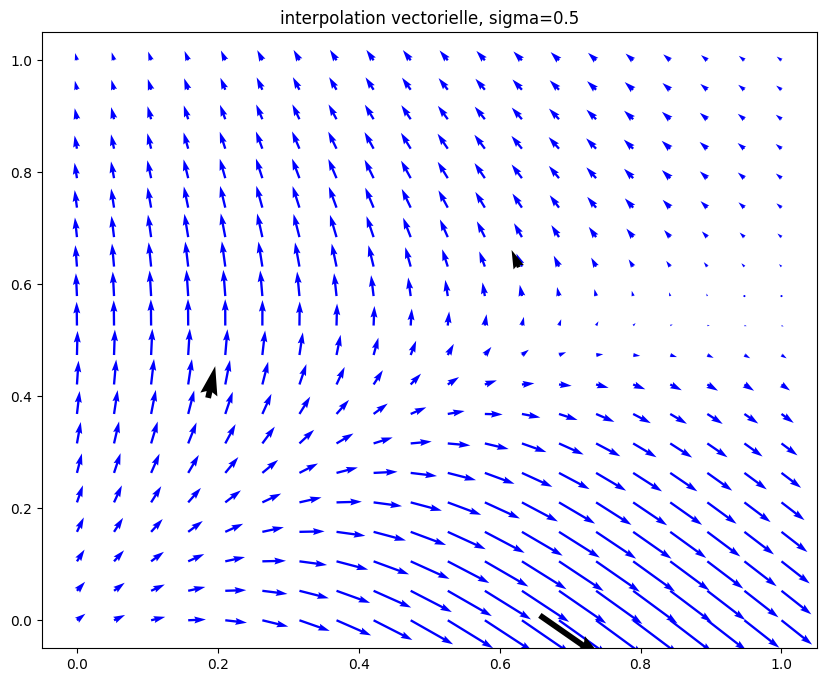

In [13]:
def InterpGrid2D(X1,X2,y,c,h,l=0) :
    ng1, ng2 = X1.shape
    x = np.concatenate((X1.reshape(ng1*ng2, 1), X2.reshape(ng1*ng2, 1)), axis=1)
    v = Interp(x,y,c,h,l) 
    V1 = v[:,0].reshape(ng1,ng2)
    V2 = v[:,1].reshape(ng1,ng2)
    return V1,V2
        
n = 3
d = 2
m = 2
sigma = .5
y = np.random.rand(n,d)
gamma = 0.05*np.random.randn(n,m)
t = np.linspace(0,1,20)
X1, X2 = np.meshgrid(t,t)
V1, V2 = InterpGrid2D(X1,X2,y,gamma,gauss(sigma))
plt.title("interpolation vectorielle, sigma="+str(sigma))
plt.quiver(X1,X2,V1,V2,color='b')    # X1, X2: arrow locations  V1, V2: arrow directions
plt.quiver(y[:,0],y[:,1],gamma[:,0],gamma[:,1]);

<br>
<br>

## Pairing of labeled points

### Linear pairing

The previous vector interpolation problem, for $d=m$, can be seen as a point matching problem. For the "exact" version, this is written:
$$ \left\{\begin{array}{l} \phi(y_i)=z_i\qquad \forall i\in\{1,\ldots,n\},
\\\phi(x)=x+v(x)
\\ \|v\|_V \text{ minimal}.\end{array}\right.$$

We simply return to the previous problem by posing $\gamma_i=z_i-y_i$.

<br>

__Question 11__: We place ourselves in the plan ($d=m=2$). Take the example from the previous question, this time displaying the $y_i$ and $z_i$ points in the same graph and visualize the $\phi$ solution by calculating and displaying the movement of a grid of points.

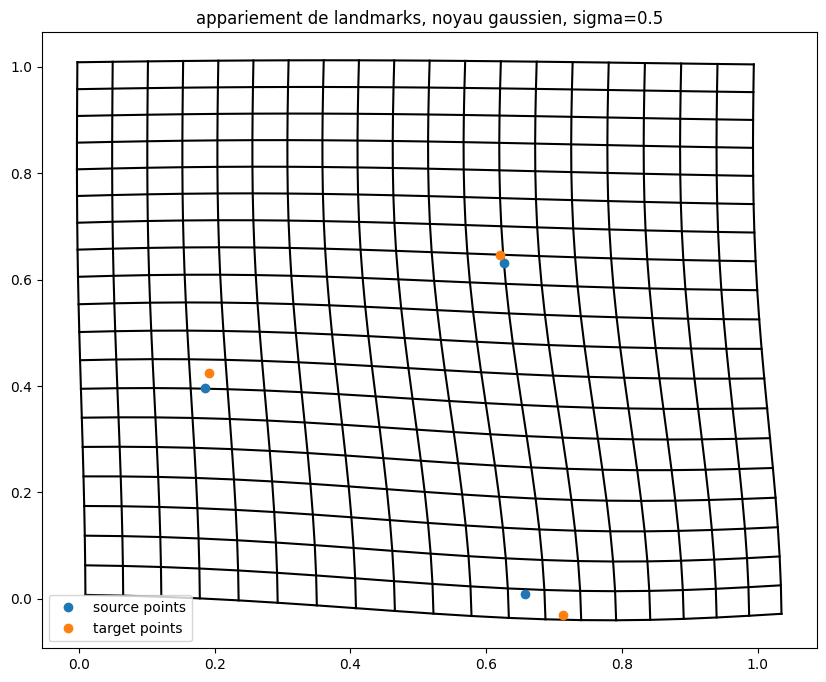

In [14]:
Z1 = X1 + V1
Z2 = X2 + V2
z = y + gamma
plt.figure();
plt.title("appariement de landmarks, "+id+", sigma="+str(sigma)) # (pairing of landmarks)
plt.plot(Z1,Z2,'k');
plt.plot(Z1.T,Z2.T,'k');
plt.plot(y[:,0],y[:,1],'o',label="source points");
plt.plot(z[:,0],z[:,1],'o',label="target points");
plt.legend();

<br>

__Question 12__: Load the `hand1.mat` and `hand2.mat` files with the commands:

In [15]:
import scipy.io
C1 = scipy.io.loadmat('hand1.mat')['C1']
C2 = scipy.io.loadmat('hand2.mat')['C2']

Tables `C1` and `C2`
contain the coordinates of two hand contours. With the following code, select reference points (fingertips, etc.) for each:

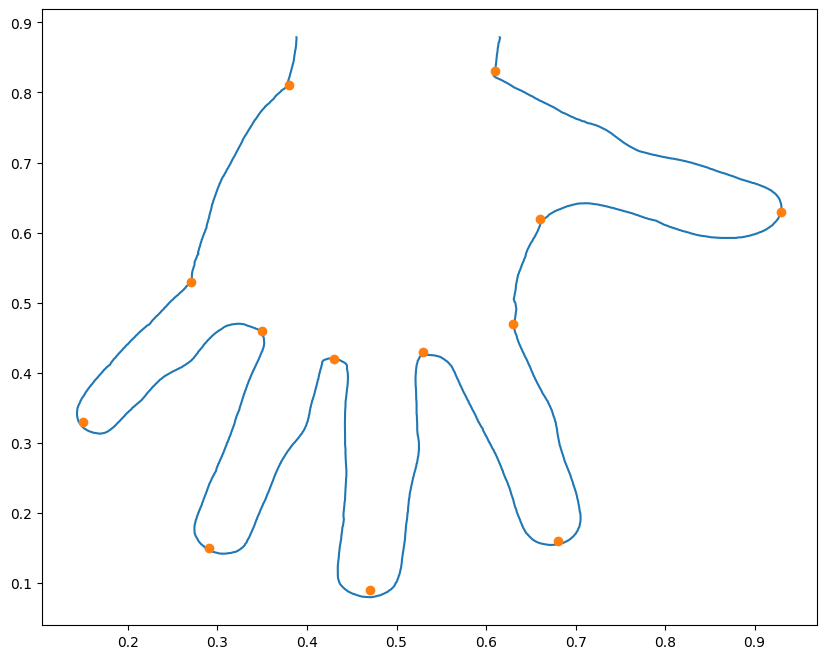

y= [[0.61 0.83]
 [0.93 0.63]
 [0.66 0.62]
 [0.63 0.47]
 [0.68 0.16]
 [0.53 0.43]
 [0.47 0.09]
 [0.43 0.42]
 [0.29 0.15]
 [0.35 0.46]
 [0.15 0.33]
 [0.27 0.53]
 [0.38 0.81]]


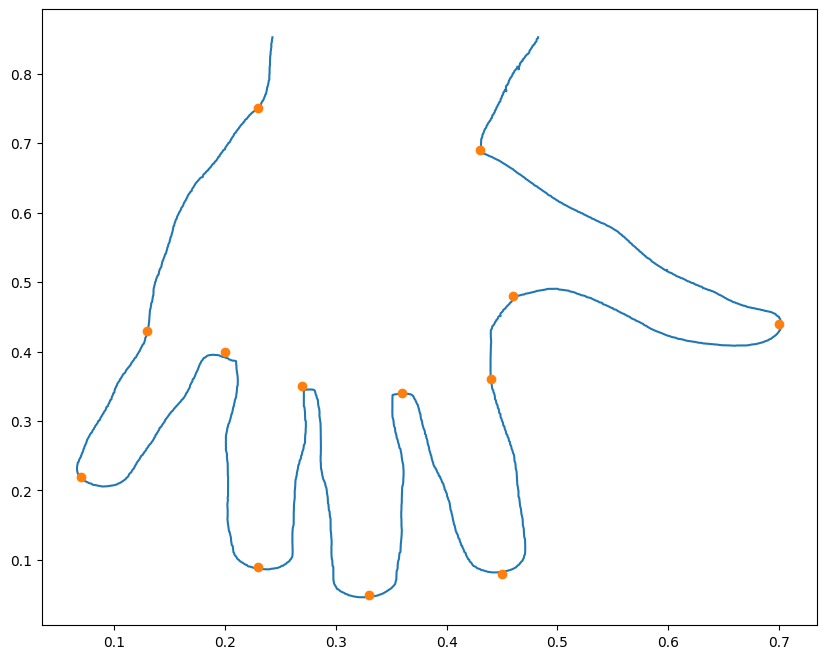

z= [[0.43 0.69]
 [0.7  0.44]
 [0.46 0.48]
 [0.44 0.36]
 [0.45 0.08]
 [0.36 0.34]
 [0.33 0.05]
 [0.27 0.35]
 [0.23 0.09]
 [0.2  0.4 ]
 [0.07 0.22]
 [0.13 0.43]
 [0.23 0.75]]


In [16]:
do_ginput = False

if do_ginput:
    %matplotlib tk

plt.rcParams["figure.figsize"] = (10,8)
plt.figure()
plt.plot(C1[:,0],C1[:,1])
if do_ginput:
    plt.title("Sélectionner les points y_i puis appuyer sur Entrée")
    y = np.array(plt.ginput(0))
else:
    y= np.array([[0.61,0.83],[0.93,0.63],[0.66,0.62],[0.63,0.47],[0.68,0.16],[0.53,0.43],
                 [0.47,0.09],[0.43,0.42],[0.29,0.15],[0.35,0.46],[0.15,0.33],[0.27,0.53],[0.38,0.81]])
plt.plot(y[:,0],y[:,1],'o')
plt.show()
print("y=",y)

plt.figure()
plt.plot(C2[:,0],C2[:,1])
if do_ginput:
    plt.title("Sélectionner les points z_i puis appuyer sur Entrée")
    z = np.array(plt.ginput(0))
else:
    z = np.array([[0.43,0.69],[0.70,0.44],[0.46,0.48],[0.44,0.36],[0.45,0.08],[0.36,0.34],
                  [0.33,0.05],[0.27,0.35],[0.23,0.09],[0.20,0.40],[0.07,0.22],[0.13,0.43],[0.23,0.75]])
plt.plot(z[:,0],z[:,1],'o')
plt.show()
print("z=",z)

<br>

Match the two sets of points then display on the same graph the $C_2$ curve and its reference points, the transformed $\phi(C_1)$ curve and the movement of a grid of points.

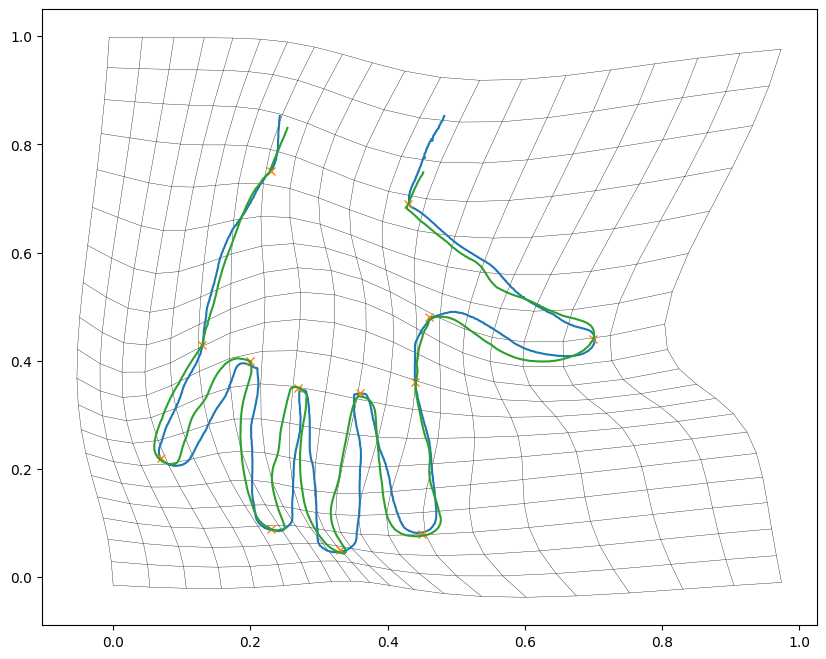

In [17]:
sigma = .25
Z1, Z2 = InterpGrid2D(X1,X2,y,z-y,gauss(sigma))    # gamma = z - y
Z1 += X1                                           # interpolate grid -> interpolate curve
Z2 += X2
plt.figure()
plt.plot(Z1,Z2,'k',linewidth=.25);
plt.plot(Z1.T,Z2.T,'k',linewidth=.25);
plt.plot(C2[:,0],C2[:,1])
plt.plot(z[:,0],z[:,1],'x');
C1phi = C1 + Interp(C1,y,z-y,gauss(sigma))   # ?
plt.plot(C1phi[:,0],C1phi[:,1]);

<br>
<br>

## Added affine displacements and Thin Plate Splines model

It is possible to add affine displacements to the model. The exact matching problem then becomes:

$$ \left\{\begin{array}{l} \phi(y_i)=z_i\qquad \forall i\in\{1,\ldots,n\},
\\\phi(x)=x+v(x)+Bx+c
\\ \|v\|_V \text{ minimal}.\end{array}\right.$$

where $B$ is a square matrix of size $d$ and $c$ a vector. It can be shown that the optimal vector field is always written as a linear combination of $K_V(\cdot,y_i)$ kernels.

<br>

__Question 13__: Find the linear system to solve to obtain the coefficients of the vectors $\alpha_i$, $c$, and the $B$ matrix (_indication: consider the Karush-Kuhn-Tucker conditions at the optimum for get the missing equations_), then implement this matching. Take the example of hand contours again with this new model.

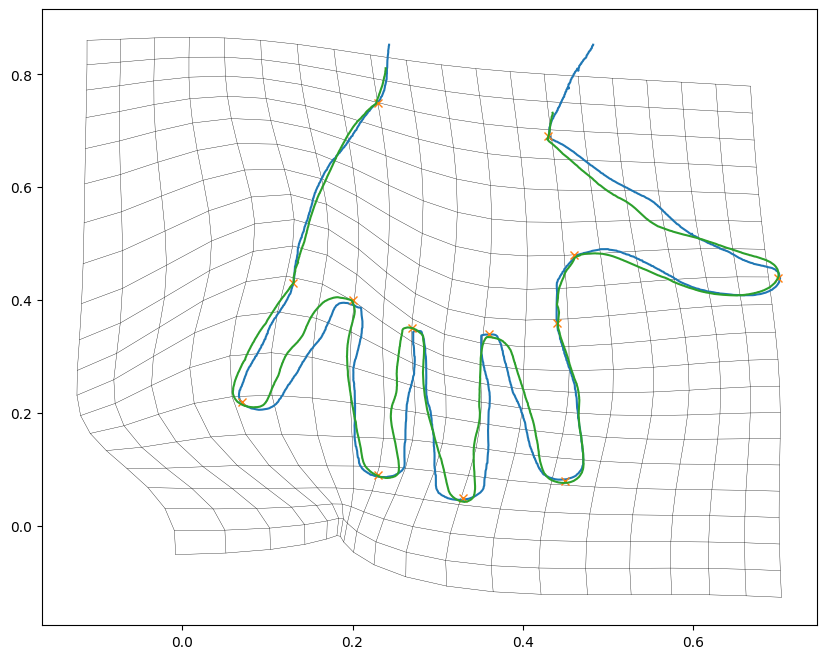

In [18]:
def InterpAffine(x,y,c,h,l=0):
    n,d = y.shape
    Kyy =  KernelMatrix(y,y,h) + l*np.eye(n)
    yt = np.concatenate((np.ones((n,1)),y),axis=1)
    M1 = np.concatenate((Kyy,yt),axis=1)
    M2 = np.concatenate((yt.T,np.zeros((d+1,d+1))),axis=1)
    M = np.concatenate((M1,M2))  
    ct = np.concatenate((c,np.zeros((d+1,c.shape[1]))))
    a = np.linalg.solve(M,ct)
    Kxy = KernelMatrix(x,y,h)
    nx = x.shape[0]
    xt = np.concatenate((np.ones((nx,1)),x),axis=1)
    N = np.concatenate((Kxy,xt),axis=1)
    return np.dot(N,a)

def InterpGrid2DAffine(X1,X2,y,c,h,l=0) :
    ng1, ng2 = X1.shape
    x = np.concatenate((X1.reshape(ng1*ng2,1),X2.reshape(ng1*ng2,1)),axis=1)
    z = InterpAffine(x,y,c,h,l) 
    Z1 = z[:,0].reshape(ng1,ng2)
    Z2 = z[:,1].reshape(ng1,ng2)
    return Z1,Z2
        

sigma = .25
Z1, Z2 = InterpGrid2DAffine(X1,X2,z,z-y,gauss(sigma))
Z1 += X1
Z2 += X2
plt.figure()
plt.plot(Z1,Z2,'k',linewidth=.25);
plt.plot(Z1.T,Z2.T,'k',linewidth=.25);
plt.plot(C2[:,0],C2[:,1])
plt.plot(z[:,0],z[:,1],'x');
C1phi = C1 + InterpAffine(C1,y,z-y,gauss(sigma))
plt.plot(C1phi[:,0],C1phi[:,1]);

<br>

__Question 14__: Now test this new model with the $h(r)=r^2\log(r)$ kernel. This kernel is not of positive type but semi-positive, and can only be used by including affine transformations. This is the “thin plate” spline model (TPS: Thin Plate Splines).

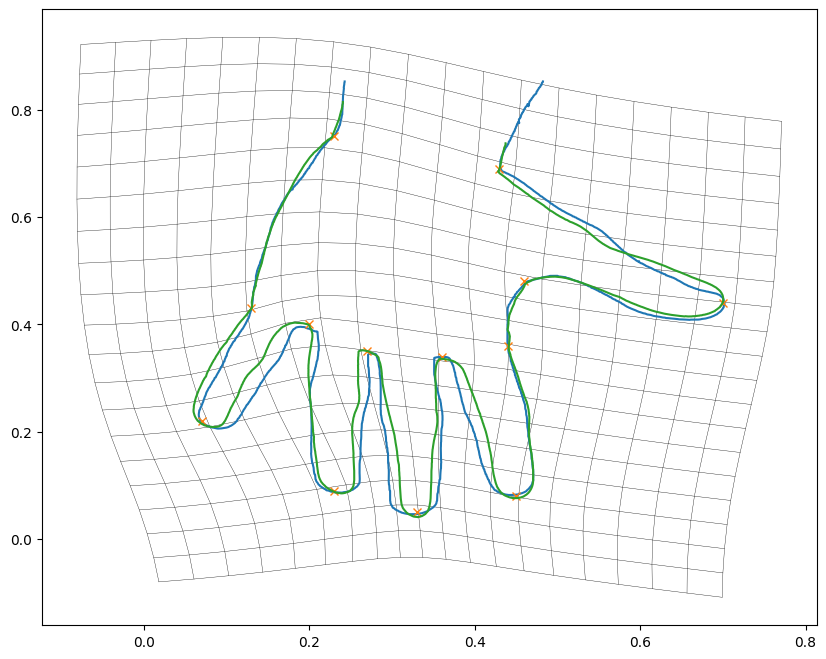

In [19]:
def TPSfun(r):
    r[r==0]=1
    return r**2 * np.log(r)
Z1, Z2 = InterpGrid2DAffine(X1,X2,y,z-y,TPSfun)
Z1 += X1
Z2 += X2
plt.figure()
plt.plot(Z1,Z2,'k',linewidth=.25);
plt.plot(Z1.T,Z2.T,'k',linewidth=.25);
plt.plot(C2[:,0],C2[:,1])
plt.plot(z[:,0],z[:,1],'x');
C1phi = C1 + InterpAffine(C1,y,z-y,TPSfun)
plt.plot(C1phi[:,0],C1phi[:,1]);